# Detección de objetos - Equipo 512 - M.P.I - 9/11/2023.

### Integrantes:
- Carapia Barcena Mauricio Javier.
- Landeros Castellanos Jared Noe.
- Martínez Arroyo Edgar Rodrigo.
- Peña Bravo María Cecilia.
- Romero Olaéz Gustavo.

### ☑️ - Miembro de análisis exploratorio.

# Recarga para la clase guardada en tiempo real de análisis de figuras

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importaciones para generaciones ☑️

In [1]:
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from skimage.draw import disk, polygon, rectangle
import seaborn as sns

c:\Users\burbu\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Importaciones para clase

In [79]:
%%writefile shape_analyzer.py
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.draw import disk, polygon, rectangle
from skimage import measure

Overwriting shape_analyzer.py


# Primera parte de análisis exploratorio - Imágenes binarias ☑️

### Generación de círculos ☑️

In [80]:
def generate_colored_circles(image_shape, num_shapes=33):
    visualization_image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)

    for i in range(num_shapes):
        individual_image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)
        
        radius = random.randint(10, 50)
        center = (random.randint(radius, image_shape[0] - radius), random.randint(radius, image_shape[1] - radius))
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))  # Color aleatorio (R, G, B)
        rr, cc = disk(center, radius)
        
        individual_image[rr, cc] = color
        visualization_image[rr, cc] = color  

        filename = f'./Figuras/Círculos/circle_{i + 1}.jpg'
        cv2.imwrite(filename, individual_image)

    return visualization_image

### Generación de triángulos ☑️

In [81]:
def generate_colored_triangles(image_shape, num_shapes=33):
    visualization_image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)

    for _ in range(num_shapes):
        individual_image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)

        triangle_type = np.random.randint(3)
    
        center_x = np.random.randint(100, image_shape[1] - 100)
        center_y = np.random.randint(100, image_shape[0] - 100)
        

        side_length = np.random.randint(50, 100)
        
        if triangle_type == 0:  
            vertices = np.array([
                [center_x - side_length // 2, center_y + int(np.sqrt(3) * side_length) // 2],
                [center_x + side_length // 2, center_y + int(np.sqrt(3) * side_length) // 2],
                [center_x, center_y - int(np.sqrt(3) * side_length) // 2]
            ])
        elif triangle_type == 1:  
            vertices = np.array([
                [center_x - side_length // 2, center_y + int(np.sqrt(3) * side_length) // 2],
                [center_x + side_length // 2, center_y + int(np.sqrt(3) * side_length) // 2],
                [center_x, center_y - int(np.sqrt(3) * side_length) // 2]
            ])
        else:  
            side_length1 = side_length
            side_length2 = np.random.randint(50, 100)  
            side_length3 = np.random.randint(50, 100) 
            
            while side_length2 == side_length1 or side_length3 == side_length1 or side_length2 == side_length3:
                side_length2 = np.random.randint(50, 100)
                side_length3 = np.random.randint(50, 100)
            
            vertices = np.array([
                [center_x - side_length1 // 2, center_y + int(np.sqrt(3) * side_length1) // 2],
                [center_x + side_length2 // 2, center_y + int(np.sqrt(3) * side_length2) // 2],
                [center_x - side_length3 // 2, center_y - int(np.sqrt(3) * side_length3) // 2]
            ])
        
        rr, cc = polygon(vertices[:, 1], vertices[:, 0])
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) 
        
        individual_image[rr, cc] = color
        visualization_image[rr, cc] = color  

        filename = f'./Figuras/Triángulos/triangle_{_+ 1}.jpg'
        cv2.imwrite(filename, individual_image)
    return visualization_image

### Generación de rectángulos ☑️

In [82]:
def generate_colored_rectangles(image_shape, num_shapes=33):
    visualization_image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)

    for _ in range(num_shapes):
        individual_image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)
        max_width = min(100, image_shape[1])
        max_height = min(100, image_shape[0])
        start_x = random.randint(0, image_shape[1] - max_width)
        start_y = random.randint(0, image_shape[0] - max_height)
        width = random.randint(10, max_width)
        height = random.randint(10, max_height)
        extent = (width, height)
        rr, cc = rectangle((start_y, start_x), extent=extent)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) 
        
        individual_image[rr, cc] = color
        visualization_image[rr, cc] = color  

        filename = f'./Figuras/Rectángulos/rectangle_{_+ 1}.jpg'
        cv2.imwrite(filename, individual_image)
    return visualization_image

### Generación de figuras aleatorias con base a las tres anteriores y clasificación esperada. (Solo para entrenamiento, no incluido en análisis exploratorio).

In [83]:
def generate_colored_random_shapes(image_shape, num_shapes=33):
    image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)
    generators = [generate_colored_circles, generate_colored_triangles, generate_colored_rectangles]

    shape_counts = {'Círculo': 0, 'Triángulo': 0, 'Rectángulo': 0}

    for _ in range(num_shapes):
        shape_generator = random.choice(generators)
        shape_image = shape_generator(image_shape, 1)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        image += shape_image * np.array(color, dtype=np.uint8)
        
        shape_type = 'Círculo' if shape_generator == generate_colored_circles else \
                     'Triángulo' if shape_generator == generate_colored_triangles else \
                     'Rectángulo'
        shape_counts[shape_type] += 1

    with open('./Figuras/Aleatorio_Esperado.csv', 'w', newline='') as file:
        csv_writer = csv.writer(file)
        csv_writer.writerow(['Tipo de Figura', 'Conteo'])
        for shape_type, count in shape_counts.items():
            csv_writer.writerow([shape_type, count])

    return image

### Declaraciones de imágenes generadas por funciones ☑️

In [84]:
image_shape = (3000, 3000)
colored_images = [
    generate_colored_circles(image_shape),
    generate_colored_triangles(image_shape),
    generate_colored_rectangles(image_shape),
    generate_colored_random_shapes(image_shape)
]

# Segunda parte de análisis exploratorio - Extracción y procesamiento de características ☑️

In [85]:
%%writefile -a shape_analyzer.py
class ShapeAnalyzer:
    def __init__(self, colored_images):
        self.colored_images = colored_images

Appending to shape_analyzer.py


### Propiedades ☑️

In [86]:
%%writefile -a shape_analyzer.py
    def calculate_properties(self, prop):
        properties = {
            'area': prop.area,
            'bounding_box': prop.bbox,
            'centroid': prop.centroid,
            'convex_area': prop.convex_area,
            'convex_image': prop.convex_image,
            'coordinates': prop.coords,
            'eccentricity': prop.eccentricity,
            'equivalent_diameter': prop.equivalent_diameter,
            'euler_number': prop.euler_number,
            'extent': prop.extent,
            'filled_area': prop.filled_area,
            'filled_image': prop.filled_image,
            'major_axis_length': prop.major_axis_length,
            'minor_axis_length': prop.minor_axis_length,
            'orientation': prop.orientation,
            'perimeter': prop.perimeter,
            'solidity': prop.solidity,
            'circularity': (4 * np.pi * prop.area) / (prop.perimeter ** 2) if prop.perimeter != 0 else 0,
            'convexity': prop.convex_area / prop.area if prop.area != 0 else 0,
        }

        if hasattr(prop, 'intensity_image'):
            properties['intensity'] = prop.mean_intensity if isinstance(prop.mean_intensity, (float, int)) else prop.median_intensity
        else:
            properties['intensity'] = None

        return properties

Appending to shape_analyzer.py


## Lo siguiente no fue incluido en análisis exploratorio. Este código fue preeliminar para simular un modelo de detección y su evaluación (que ameritaría un reporte diferente, posiblemente en el proyecto intermedio como contraste de un modelo real y de la optimización de discriminación).

### Determinar tipo de figura. 

In [87]:
%%writefile -a shape_analyzer.py
    def determine_shape(self, properties):
                num_vertices = len(properties['bounding_box'])

                aspect_ratio_range = (1.5, 2.5)

                minr, minc, maxr, maxc = properties['bounding_box']
                width = maxc - minc
                height = maxr - minr
                aspect_ratio = width / height

                if properties['circularity'] > 0.9 and properties['eccentricity'] < 0.1:
                    return 'Círculo'
                elif properties['convexity'] == 1 and properties['solidity'] < 0.9:
                    return 'Triángulo'
                elif aspect_ratio >= aspect_ratio_range[0] and aspect_ratio <= aspect_ratio_range[1]:
                    return 'Rectángulo'
                elif 0.9 <= aspect_ratio <= 1.1:
                    return 'Rectángulo'
                elif num_vertices == 3 or num_vertices == 4: 
                    angles = [0, 0, 0, 0]
                    if width > 0 and height > 0:
                        angles[0] = np.arctan2(height, width) * 180 / np.pi
                        angles[1] = 90 - angles[0]
                        angles[2] = angles[0]
                        angles[3] = angles[1]

                    if sum(angles) == 180:
                        return 'Triángulo'
                    elif sum(angles) == 360:
                        return 'Rectángulo'

Appending to shape_analyzer.py


### Análisis (etiquetado, clasificación, cálculo)

In [88]:
%%writefile -a shape_analyzer.py
    def analyze_shapes(self, colored_image, ax):
                label_image = measure.label(np.any(colored_image > 0, axis=2))
                props = measure.regionprops(label_image)
                ax.imshow(colored_image)
                
                for prop in props:
                    shape_properties = self.calculate_properties(prop)
                    shape_type = self.determine_shape(shape_properties)
                    minr, minc, maxr, maxc = prop.bbox
                    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                            fill=False, edgecolor='red', linewidth=2)
                    ax.add_patch(rect)
                    ax.text(minc, minr, shape_type, color='yellow', fontsize=12)

Appending to shape_analyzer.py


### Imprimir resultados y crear archivo de conteo. Excepción: Aquí se almacenan los datos sintéticos (imágenes binarias en CSV ☑️).

In [89]:
%%writefile -a shape_analyzer.py
    def make_results_for_all_images(self):
        fig, axes = plt.subplots(1, len(self.colored_images), figsize=(30, 7))
        if len(self.colored_images) == 1:
            axes = [axes]

        category_titles = ['Circles', 'Triangles', 'Rectangles', 'Mezcla de los tres tipos']

        shape_counts = {
            'circles': {'Círculo': 0, 'Triángulo': 0, 'Rectángulo': 0},
            'triangles': {'Círculo': 0, 'Triángulo': 0, 'Rectángulo': 0},
            'rectangles': {'Círculo': 0, 'Triángulo': 0, 'Rectángulo': 0},
            'random_shapes': {'Círculo': 0, 'Triángulo': 0, 'Rectángulo': 0}
        }

        combined_data = []
        for i, colored_image in enumerate(self.colored_images):
            label_image = measure.label(np.any(colored_image > 0, axis=2))
            props = measure.regionprops(label_image)
            ax = axes[i] if len(self.colored_images) > 1 else axes
            ax.imshow(colored_image)
            ax.set_title(category_titles[i])

            current_shape_counts = {'Círculo': 0, 'Triángulo': 0, 'Rectángulo': 0}
            figures_data = []
            for prop in props:
                shape_properties = self.calculate_properties(prop)
                shape_type = self.determine_shape(shape_properties)
                current_shape_counts[shape_type] += 1

                minr, minc, maxr, maxc = prop.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                        fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)
                ax.text(minc, minr, shape_type, color='yellow', fontsize=12)

                figure_data = {'Category': category_titles[i]}
                figure_data.update(shape_properties)
                figures_data.append(figure_data)

            df_figures = pd.DataFrame(figures_data)
            combined_data.append(df_figures)

            category_names = ['circles', 'triangles', 'rectangles', 'random_shapes']
            if i < len(category_names):
                category_name = category_names[i]
                shape_counts[category_name] = current_shape_counts

        if combined_data:
            combined_df = pd.concat(combined_data, ignore_index=True)
            combined_df = combined_df[combined_df['Category'] != 'Mezcla de los tres tipos']
            combined_df = combined_df[['Category'] + [col for col in combined_df.columns if col != 'Category']]
            combined_df.to_csv('./Propiedades/Combinado.csv', index=False)
        else:
            print("No se pudo crear el archivo combinado porque no se encontraron archivos CSV para las categorías.")

        plt.tight_layout()
        plt.show()

        return shape_counts

Appending to shape_analyzer.py


### Implementación

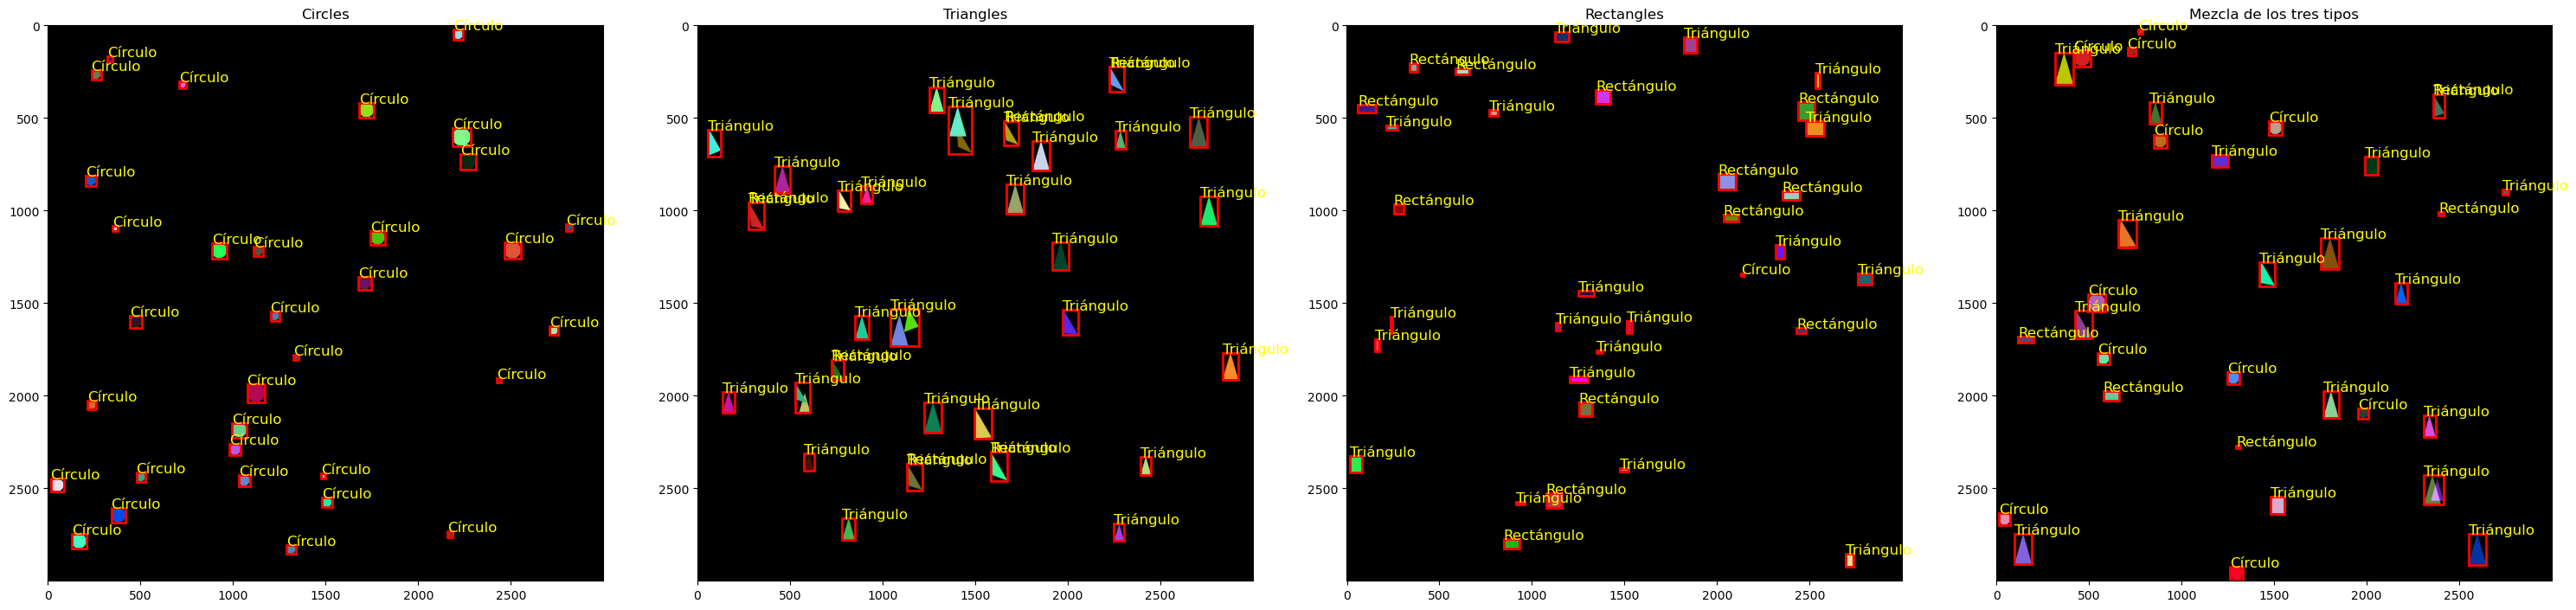

In [90]:
from shape_analyzer import ShapeAnalyzer

shape_analyzer = ShapeAnalyzer(colored_images)
predictions = shape_analyzer.make_results_for_all_images()

# Evaluación del modelo simulado. (Tampoco incluido).

## Matriz de confusión

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score

def calculate_metrics(true_labels, predicted_labels):
    labels = ['Círculo', 'Triángulo', 'Rectángulo']
    
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    print("Matriz de confusión:")
    print(conf_matrix)
    print(f"Precisión: {accuracy}")
    
    return conf_matrix, accuracy

### Cálculo con recepción de parámetros

In [92]:
def calculate_metrics(true_labels, predicted_labels):
    labels = ['Círculo', 'Triángulo', 'Rectángulo']
    
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    print("Matriz de confusión:")
    print(conf_matrix)
    print(f"Precisión: {accuracy}")
    
    return conf_matrix, accuracy

### Primera gráfica (Tipo círculo)

In [93]:
circles_counts = predictions['circles']
true_labels_random_image = ['Círculo'] * 33 + ['Triángulo'] * 0 + ['Rectángulo'] * 0
predicted_labels_circles_image = ['Círculo'] * circles_counts['Círculo'] + \
                                 ['Triángulo'] * circles_counts['Triángulo'] + \
                                 ['Rectángulo'] * circles_counts['Rectángulo']
conf_matrix, accuracy = calculate_metrics(true_labels_random_image, predicted_labels_circles_image)

Matriz de confusión:
[[33  0  0]
 [ 0  0  0]
 [ 0  0  0]]
Precisión: 1.0


### Segunda gráfica (Tipo triángulo)

In [94]:
triangles_counts = predictions['triangles']
true_labels_random_image = ['Círculo'] * 0 + ['Triángulo'] * 36 + ['Rectángulo'] * 0
predicted_labels_triangles_image = ['Círculo'] * triangles_counts['Círculo'] + \
                                 ['Triángulo'] * triangles_counts['Triángulo'] + \
                                 ['Rectángulo'] * triangles_counts['Rectángulo']
conf_matrix, accuracy = calculate_metrics(true_labels_random_image, predicted_labels_triangles_image)

Matriz de confusión:
[[ 0  0  0]
 [ 0 30  6]
 [ 0  0  0]]
Precisión: 0.8333333333333334


### Tercera gráfica (Tipo rectángulo)

In [95]:
rectangles_counts = predictions['rectangles']
true_labels_random_image = ['Círculo'] * 0 + ['Triángulo'] * 0 + ['Rectángulo'] * 33
predicted_labels_rectangles_image = ['Círculo'] * rectangles_counts['Círculo'] + \
                                 ['Triángulo'] * rectangles_counts['Triángulo'] + \
                                 ['Rectángulo'] * rectangles_counts['Rectángulo']
conf_matrix, accuracy = calculate_metrics(true_labels_random_image, predicted_labels_rectangles_image)

Matriz de confusión:
[[ 0  0  0]
 [ 0  0  0]
 [ 1 19 13]]
Precisión: 0.3939393939393939


### Cuarta gráfica (Mezcla)

In [96]:
df = pd.read_csv('./Figuras/Aleatorio_Esperado.csv')
shape_counts = df.set_index('Tipo de Figura')['Conteo'].to_dict()
random_counts = predictions['random_shapes']

true_labels_random_image = (['Círculo'] * shape_counts['Círculo'] +
                            ['Triángulo'] * shape_counts['Triángulo'] +
                            ['Rectángulo'] * shape_counts['Rectángulo'])
predicted_labels_rectangles_image = ['Círculo'] * random_counts['Círculo'] + \
                                 ['Triángulo'] * random_counts['Triángulo'] + \
                                 ['Rectángulo'] * random_counts['Rectángulo']
conf_matrix, accuracy = calculate_metrics(true_labels_random_image, predicted_labels_rectangles_image)

Matriz de confusión:
[[11  0  0]
 [ 0 14  0]
 [ 0  3  5]]
Precisión: 0.9090909090909091


# Tercer parte de análisis exploratorio - Lectura de CSV y graficado de dispersión ☑️

### Lectura ☑️

In [5]:
df = pd.read_csv('./Propiedades/Combinado.csv')

df.head(99)
category = df["Category"]
category
df.describe()

,area,convex_area,eccentricity,equivalent_diameter,euler_number,extent,filled_area,major_axis_length,minor_axis_length,orientation,perimeter,solidity,circularity,convexity,intensity
count,102.000000,102.000000,102.000000,102.000000,102.0,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,0.0
mean,3659.137255,3815.872549,0.487363,62.489728,1.0,0.778608,3659.137255,84.955844,52.632046,6.488073e-01,249.186451,0.979770,0.668058,1.023444,NaN
std,2603.875478,2997.298776,0.423645,27.594519,0.0,0.226520,2603.875478,45.453015,25.387245,5.573137e-01,137.308349,0.044742,0.270597,0.062136,NaN
min,1.000000,1.000000,0.000000,1.128379,1.0,0.340592,1.000000,0.000000,0.000000,-5.000704e-01,0.000000,0.676582,0.000000,1.000000,NaN
25%,1803.750000,1821.750000,0.000000,47.921723,1.0,0.494795,1803.750000,52.141152,34.909372,6.335887e-18,162.154329,0.977085,0.473537,1.000000,NaN
50%,3301.500000,3321.500000,0.714211,64.827211,1.0,0.809869,3301.500000,85.483596,51.820312,7.853982e-01,253.396970,0.987526,0.754904,1.012632,NaN
75%,5324.000000,5420.750000,0.871026,82.332545,1.0,1.000000,5324.000000,111.063211,73.473768,7.853982e-01,325.842668,1.000000,0.928659,1.023453,NaN
max,12828.000000,18960.000000,0.992040,127.801083,1.0,1.000000,12828.000000,228.508040,102.761861,1.570796e+00,806.842712,1.000000,1.004429,1.478017,NaN


### Graficado ☑️

<Figure size 1500x1500 with 0 Axes>

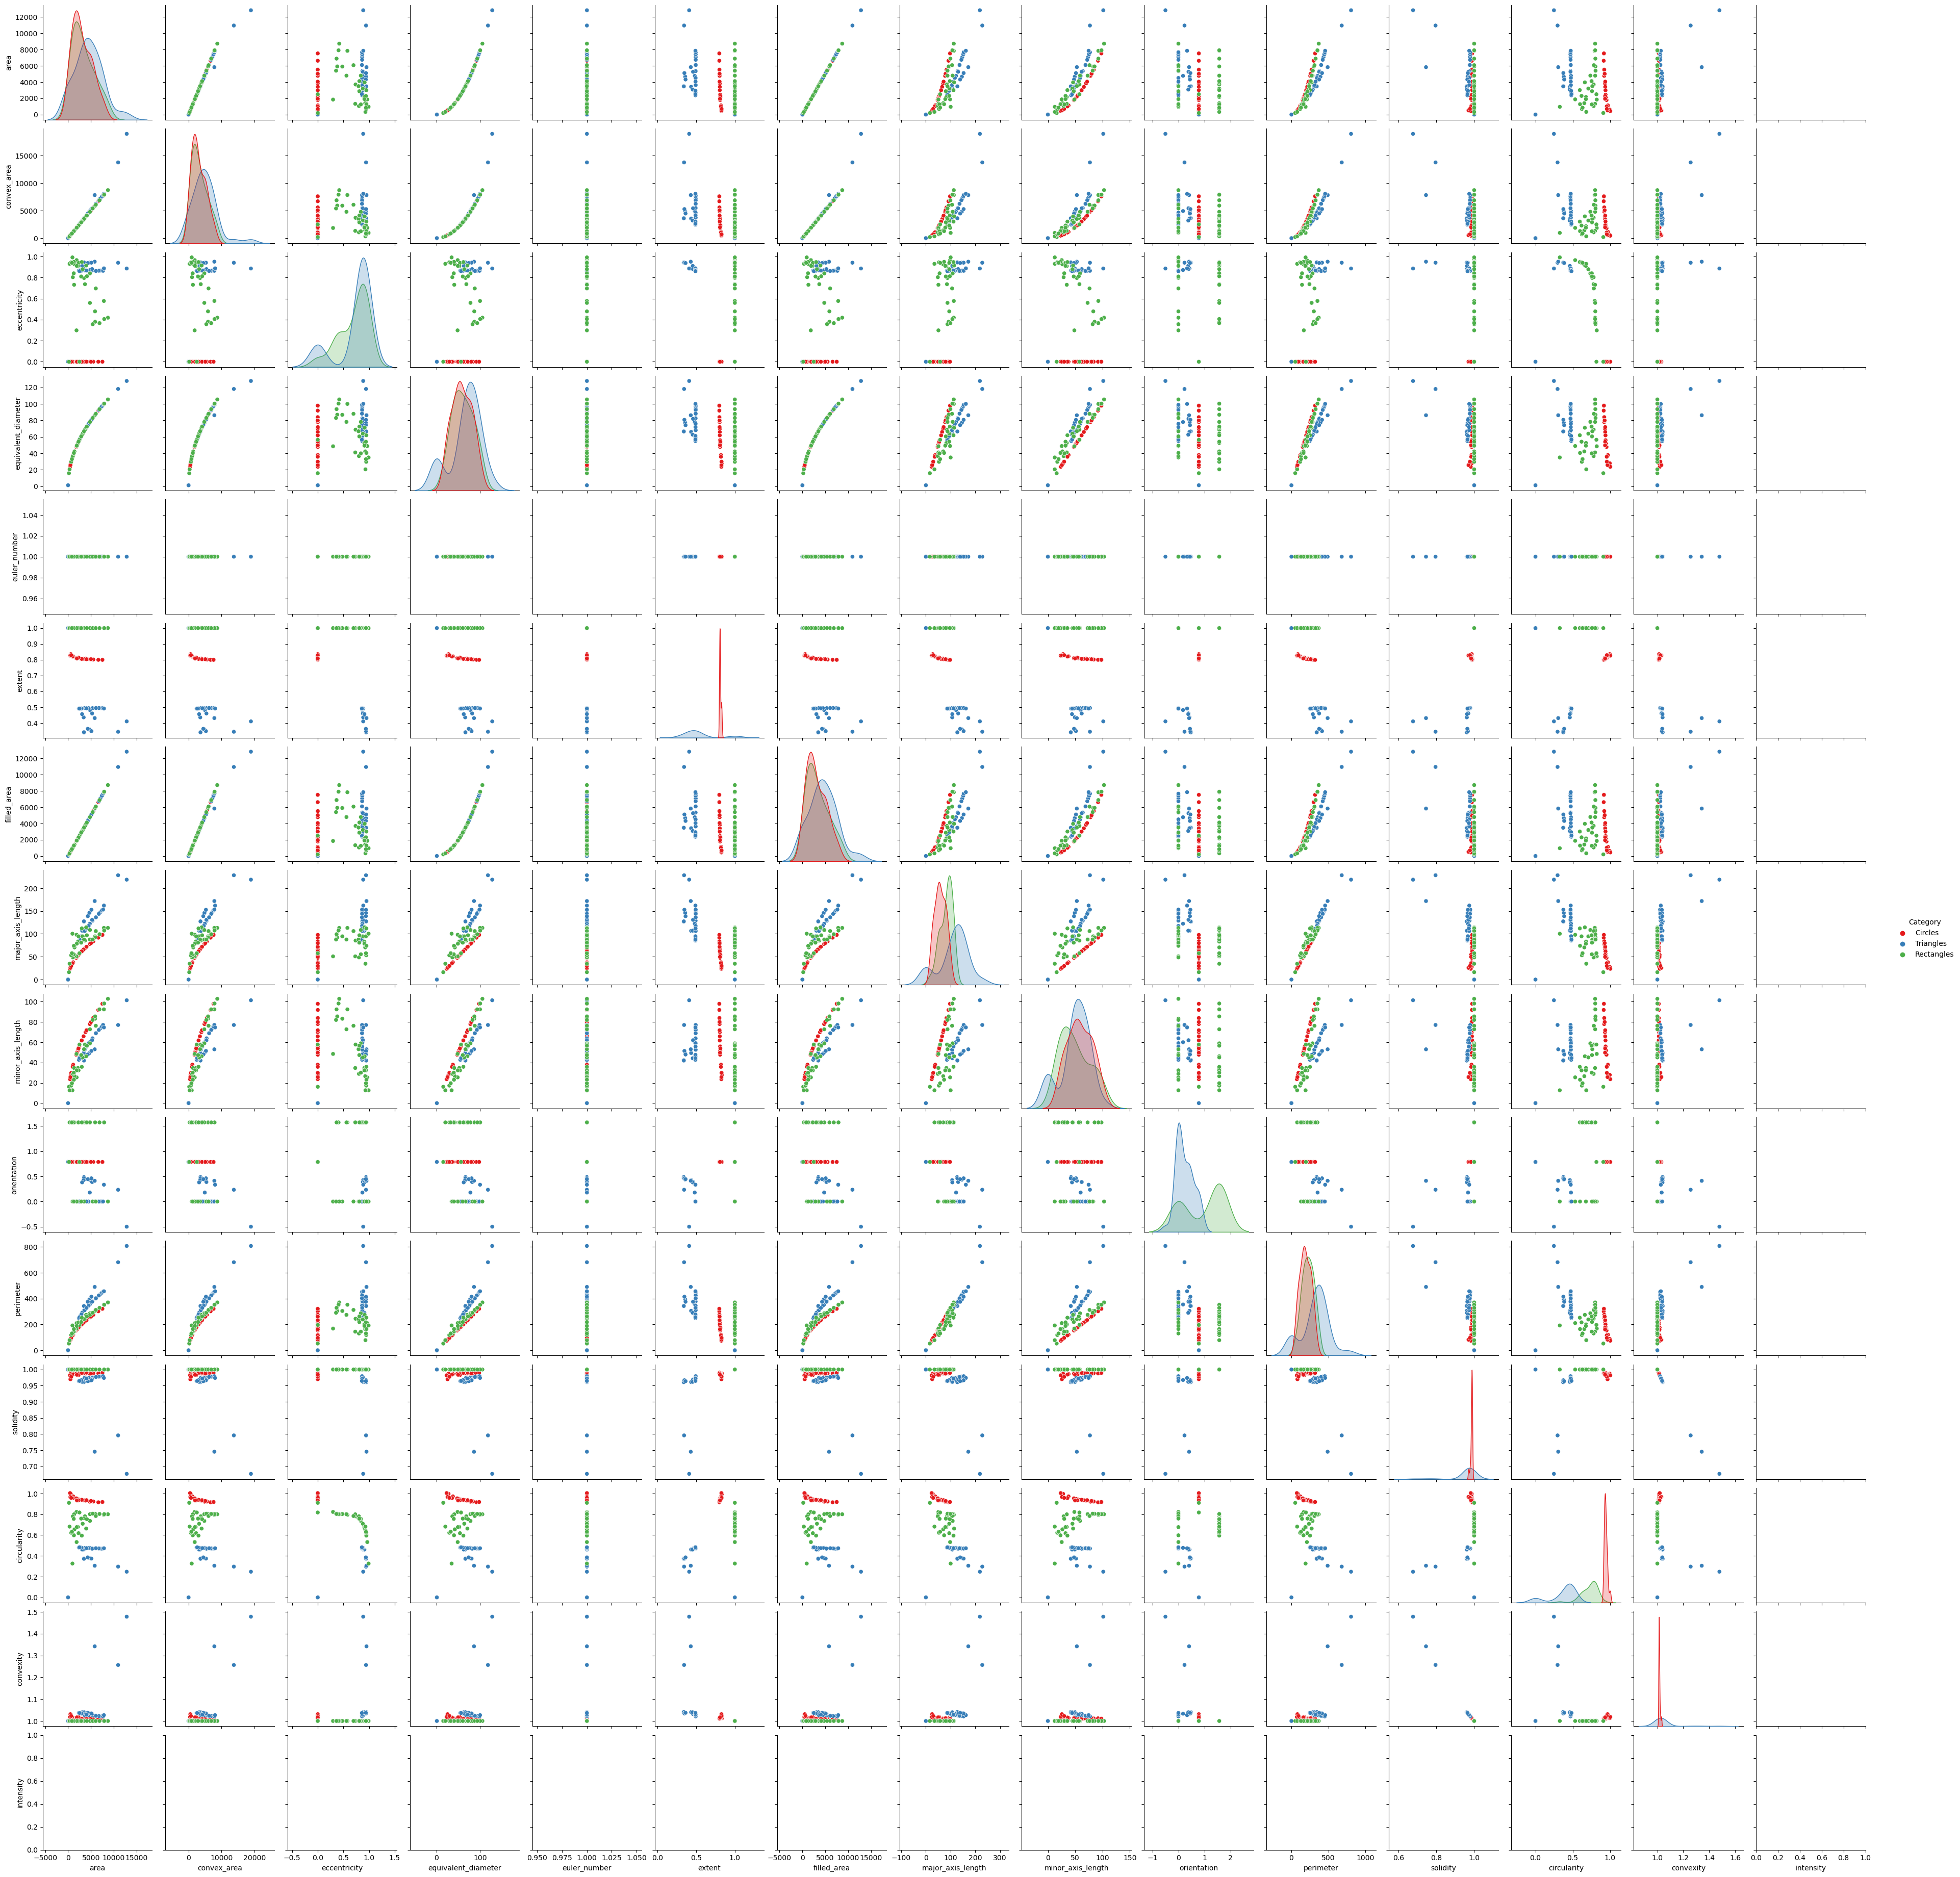

In [6]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 15))
sns.pairplot(data=df, vars=numerical_columns, hue="Category", palette="Set1")
plt.show()

# Resultados de análisis exploratorio - Selección de tres variables para discriminación ☑️

### Excentricidad con alcance ☑️

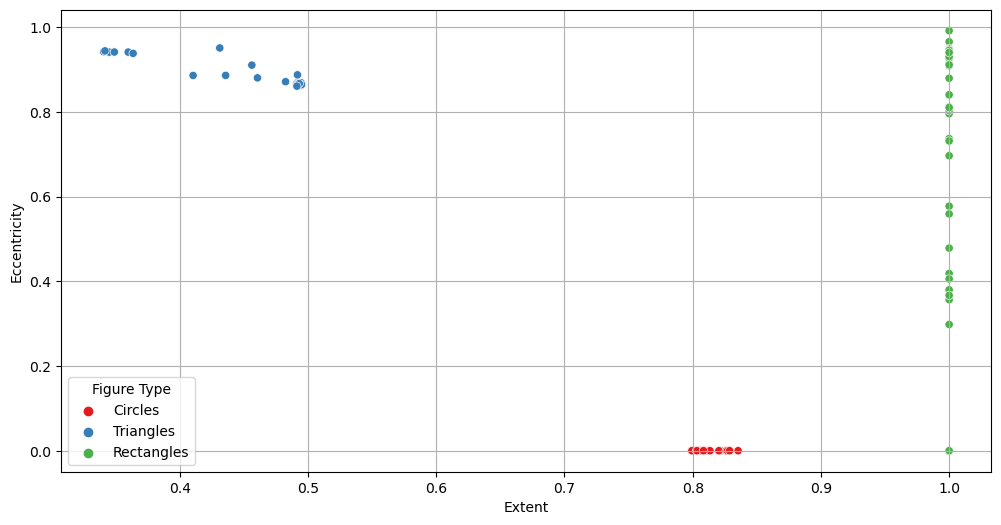

In [13]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='extent', y='eccentricity', hue='Category', palette='Set1')

plt.xlabel('Extent')
plt.ylabel('Eccentricity')
plt.legend(title='Figure Type')
plt.grid(True)
plt.show()

### Área con alcance ☑️

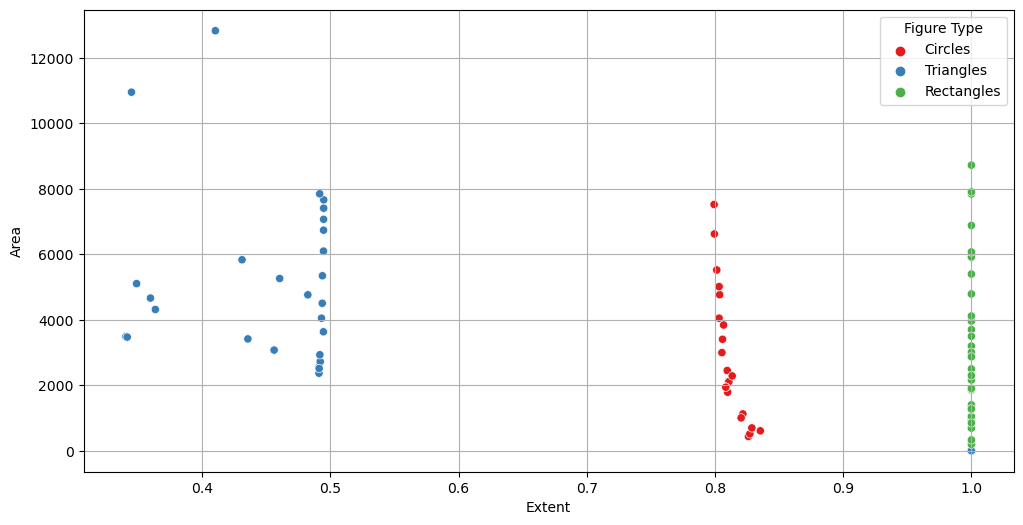

In [9]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='extent', y='area', hue='Category', palette='Set1')

plt.xlabel('Extent')
plt.ylabel('Area')
plt.legend(title='Figure Type')
plt.grid(True)
plt.show()

### Perímetro con alcance ☑️

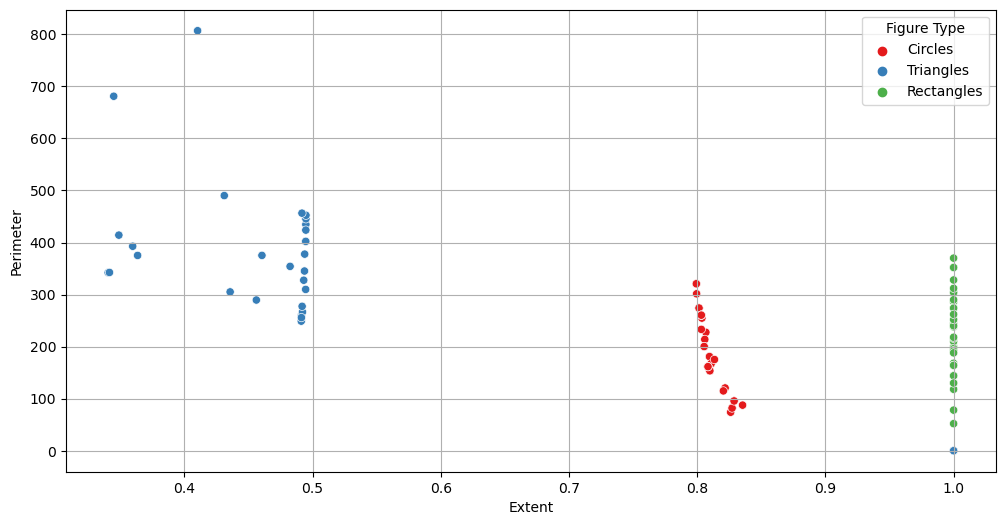

In [11]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='extent', y='perimeter', hue='Category', palette='Set1')

plt.xlabel('Extent')
plt.ylabel('Perimeter')
plt.legend(title='Figure Type')
plt.grid(True)
plt.show()